# Write a code from scratch for classificaiton of numbers 

ML101: this code is like "Hello World" for machine learning. The code already exists in [MNIST_upload.ipynb](/MNIST_upload.ipynb) 

* Read the code
* Understand each line
* write your own

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline

from sklearn.model_selection import train_test_split

# limit gpu memory usage 
# torch.cuda.set_per_process_memory_fraction(0.23, device=0)

#change to "cuda" to use GPU
device = 'cpu'



In [2]:
#read the data
with open("mnist.pkl", 'rb') as f:
    dset = pickle.load(f)

#x->input
#y->output (ground truth)
x,y = dset["x"],dset["y"]


In [8]:
N=x.shape[0]
sz= int(np.sqrt(x.shape[1]))

print(f"total samples: \t\t{N}")
print("image dimension %d x %d" % (sz, sz))
print("input size is %g" % np.square(sz))

total samples: 		70000
image dimension 28 x 28
input size is 784


5


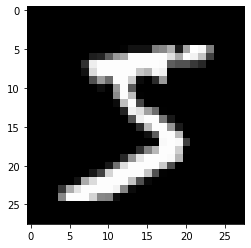

0


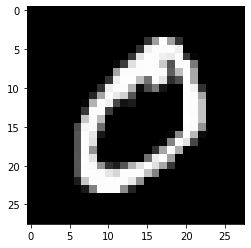

4


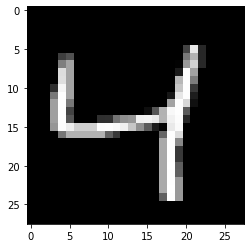

1


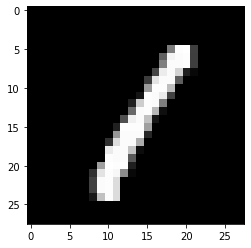

9


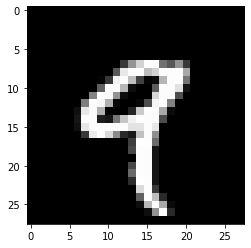

2


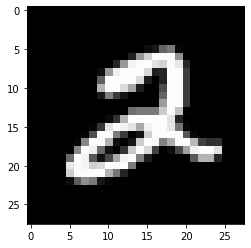

1


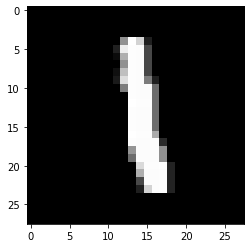

3


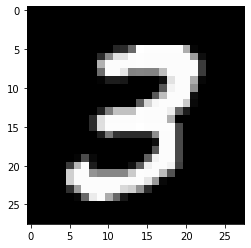

1


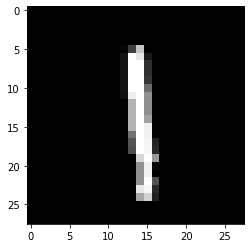

4


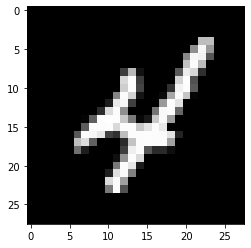

In [9]:
for img in range(10):
    print(y[img])
    img = x[img,:].reshape(sz,sz)
    plt.imshow(img,cmap='gray')
    plt.show()


In [10]:
#split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

N_train = x_train.shape[0]
print(N_train)

63000


In [10]:
#split the data in train and test
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

#N_train = x_train.shape[0]
#print(N_train)

35000


In [11]:
class MLP(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()

        self.layer1 = nn.Linear(input_dim, 20)
        self.layer2 = nn.Linear(20,50)
        self.layer3 = nn.Linear(50, output_dim)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)


    

       

In [12]:
model = MLP(sz*sz,10).to(device)
print(model)


MLP(
  (layer1): Linear(in_features=784, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=10, bias=True)
)


In [13]:
#instantiate the optimizer
optimizer = optim.Adam(model.parameters())
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [14]:
criterion = nn.CrossEntropyLoss()
batch_size = 500


In [15]:
epochs = 100
loss_list = []

for epoch in range(epochs):
    sel = np.random.choice(range(N_train),batch_size,replace=False)
    #read data from dataset
    x = torch.tensor(x_train[sel],dtype=torch.float32,device=device)
    y = torch.tensor(y_train[sel],dtype=torch.long,device=device)

    #evaluate the NN
    pred = model(x)

    #compute the loss, backward and gradient descent
    loss = criterion(pred,y)
    loss.backward()
    optimizer.step()

    #zero the gradients
    optimizer.zero_grad()

    #append loss to list
    loss_list.append(loss.detach().to('cpu'))

    #print current statistucs
    print(f"epoch={epoch}/{epochs}; loss={loss}")


epoch=0/100; loss=9.395000457763672
epoch=1/100; loss=5.6894965171813965
epoch=2/100; loss=5.35303258895874
epoch=3/100; loss=4.594344139099121
epoch=4/100; loss=3.7342841625213623
epoch=5/100; loss=3.0766241550445557
epoch=6/100; loss=2.8098983764648438
epoch=7/100; loss=2.4535892009735107
epoch=8/100; loss=2.272825002670288
epoch=9/100; loss=2.080850124359131
epoch=10/100; loss=2.2516980171203613
epoch=11/100; loss=2.0385138988494873
epoch=12/100; loss=1.9324747323989868
epoch=13/100; loss=1.8874425888061523
epoch=14/100; loss=1.7415821552276611
epoch=15/100; loss=1.719337821006775
epoch=16/100; loss=1.6606805324554443
epoch=17/100; loss=1.7415993213653564
epoch=18/100; loss=1.7177995443344116
epoch=19/100; loss=1.5841693878173828
epoch=20/100; loss=1.5556633472442627
epoch=21/100; loss=1.4995085000991821
epoch=22/100; loss=1.4330272674560547
epoch=23/100; loss=1.4036489725112915
epoch=24/100; loss=1.4438424110412598
epoch=25/100; loss=1.2854763269424438
epoch=26/100; loss=1.23874938

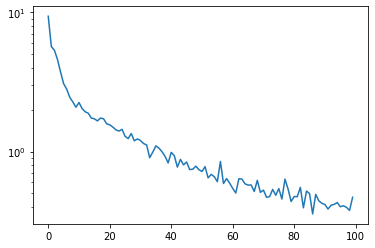

In [16]:
plt.plot(loss_list)
plt.yscale('log')
plt.show()

In [17]:
def compute_accuracy(pred, y):
    #selct the top probability
    top_pred = pred.argmax(1, keepdim = True)[:,0]
    #compute number of correct predictions
    correct = (top_pred==y).sum()
    #compute accuracy
    acc = correct.float()/y.shape[0]
    return acc

9


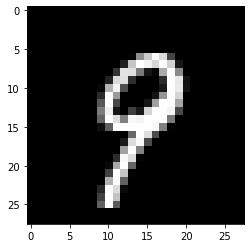

8


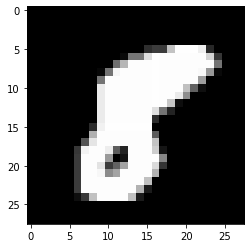

2


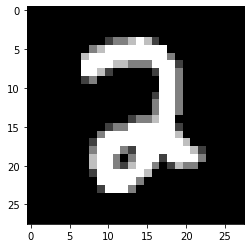

1


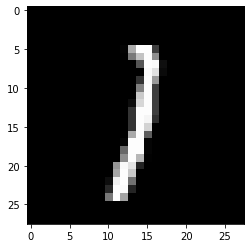

1


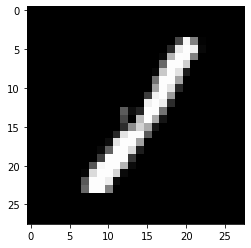

In [18]:
#let's plot some images
for img in range(5):
    print(y_test[img])
    img = x_test[img,:].reshape(sz,sz)
    plt.imshow(img,cmap='gray')
    plt.show()

In [19]:
with torch.no_grad():
    x = torch.tensor(x_test,dtype=torch.float32,device=device)
    y = torch.tensor(y_test,dtype=torch.long,device=device)

    pred = model(x)

    acc = compute_accuracy(pred,y)

    print(f"test accuracy: {acc}")

test accuracy: 0.8744285702705383


In [20]:
top_pred = pred.argmax(1, keepdim = True)[:,0]
print(top_pred)
print(y_test)
for j in range(len(y_test)):
    print("number is %g and prediction is %g" % (y_test[j], top_pred[j].float()))
    

tensor([9, 8, 2,  ..., 4, 6, 0])
[9 8 2 ... 4 6 0]
number is 9 and prediction is 9
number is 8 and prediction is 8
number is 2 and prediction is 2
number is 1 and prediction is 1
number is 1 and prediction is 1
number is 0 and prediction is 0
number is 1 and prediction is 1
number is 8 and prediction is 8
number is 5 and prediction is 5
number is 7 and prediction is 1
number is 2 and prediction is 2
number is 8 and prediction is 8
number is 1 and prediction is 1
number is 8 and prediction is 8
number is 0 and prediction is 0
number is 5 and prediction is 5
number is 4 and prediction is 4
number is 6 and prediction is 6
number is 1 and prediction is 1
number is 5 and prediction is 8
number is 9 and prediction is 8
number is 9 and prediction is 9
number is 6 and prediction is 6
number is 3 and prediction is 3
number is 5 and prediction is 3
number is 5 and prediction is 5
number is 0 and prediction is 0
number is 9 and prediction is 5
number is 7 and prediction is 7
number is 8 and predi